# FDA

---

## Functional linear models

### Function-on-scalar regression model

**Question of interest :** What is the association between treatment assignment and activity pattern?

We can use a functiuon-on-scalar regression model to answer this question:  
$$Act_i(t) = \beta_0(t) + \beta_1(t)Treatment_i  +\epsilon_i(t)$$

$$  \sum_{G = A, B, C}{\frac{n_G(\overline{G}-\overline{X})^2}{N}}$$

**Load libraries and read the data:**

In [2]:
# Libraries
library(fda)
library(tidyverse)

library(refund)
library(refund.shiny)

# theme_set(theme_bw() + theme(legend.position = "bottom"))

library(ggplot2)

In [3]:
getwd()

[1] "C:/git/smartphysicalactivity/develop/test/FDA"

In [3]:
# Read cvs file
df = read_csv("../../../data/fda/mBaseline.csv");
names(df)[names(df)=="StudyID"] <- "id"
df$id <- as.character(df$id)
head(df, 5)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double()
)
i Use `spec()` for the full column specifications.




id,Arm,T00h00,T00h01,T00h02,T00h03,T00h04,T00h05,T00h06,T00h07,...,T23h50,T23h51,T23h52,T23h53,T23h54,T23h55,T23h56,T23h57,T23h58,T23h59
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.833333,0.000000,1.833333,3.50000,3.50000,4.666667,3.00000,27.833333,...,2.333333,2.333333,0.00000,0.000000,3.000000,9.500000,10.166667,7.166667,5.50000,4.833333
4,3,18.000000,23.714286,44.000000,52.42857,34.28571,20.142857,13.71429,9.142857,...,55.000000,143.000000,143.42857,142.000000,85.857143,106.428571,69.714286,38.285714,24.57143,18.571429
40,2,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,5.00000,6.142857,8.428571,3.428571,2.285714,0.000000,0.00000,0.000000
43,2,5.285714,5.285714,7.142857,29.57143,31.57143,29.714286,2.00000,0.000000,...,43.285714,45.857143,45.85714,2.571429,0.000000,1.142857,1.142857,1.142857,0.00000,0.000000
44,3,59.857143,40.428571,75.285714,112.14286,180.57143,176.571429,163.00000,121.142857,...,102.285714,163.142857,154.57143,178.857143,88.428571,52.428571,23.000000,69.857143,107.14286,100.571429


**Define response and predictor:**

In [4]:
time <- 1:(dim(df)[2]-2)
time

[1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  180  181  182
 [183]  183  184  185  186  187  188  189  190  191  192  193  194  195  196
 [197]  197  198  199  200  201  202  203  204  205  206  207  208  209  210
 [211]  211  212  213  214  215  216  217  218  219  220  221  222  223  224
 [225]  225  226  227  228  229  230  231  232  233  234  235  236  237  238
 [239]  239  240  241  242  243  244  245  246  247  248  249  250  251  252
 [253]  253  254  255  256  257  258  259  260  261  262  263  264  265  266
 [267]  267  268  269  270  271  272  273  274  275  276  277  278  279  280
 [281]  281  282  283  284  285  286  287  288  289  290  291  292  293  294
 [295]  295  296  297  298  299  300  301  302  303  304  305  306  307  308
 [309]  309  310  311  312  313  314  315  316  317  318  319  320  321  322
 [323]  323  324  325  326  327  328  329  330  331  332  333  334  335  336
 [337]  337  338  339  340  341  342  343  344  345  346  347  348  349  350
 [351]  351  352  353  354  355  356  357  358  359  360  361  362  363  364
 [365]  365  366  367  368  369  370  371  372  373  374  375  376  377  378
 [379]  379  380  381  382  383  384  385  386  387  388  389  390  391  392
 [393]  393  394  395  396  397  398  399  400  401  402  403  404  405  406
 [407]  407  408  409  410  411  412  413  414  415  416  417  418  419  420
 [421]  421  422  423  424  425  426  427  428  429  430  431  432  433  434
 [435]  435  436  437  438  439  440  441  442  443  444  445  446  447  448
 [449]  449  450  451  452  453  454  455  456  457  458  459  460  461  462
 [463]  463  464  465  466  467  468  469  470  471  472  473  474  475  476
 [477]  477  478  479  480  481  482  483  484  485  486  487  488  489  490
 [491]  491  492  493  494  495  496  497  498  499  500  501  502  503  504
 [505]  505  506  507  508  509  510  511  512  513  514  515  516  517  518
 [519]  519  520  521  522  523  524  525  526  527  528  529  530  531  532
 [533]  533  534  535  536  537  538  539  540  541  542  543  544  545  546
 [547]  547  548  549  550  551  552  553  554  555  556  557  558  559  560
 [561]  561  562  563  564  565  566  567  568  569  570  571  572  573  574
 [575]  575  576  577  578  579  580  581  582  583  584  585  586  587  588
 [589]  589  590  591  592  593  594  595  596  597  598  599  600  601  602
 [603]  603  604  605  606  607  608  609  610  611  612  613  614  615  616
 [617]  617  618  619  620  621  622  623  624  625  626  627  628  629  630
 [631]  631  632  633  634  635  636  637  638  639  640  641  642  643  644
 [645]  645  646  647  648  649  650  651  652  653  654  655  656  657  658
 [659]  659  660  661  662  663  664  665  666  667  668  669  670  671  672
 [673]  673  674  675  676  677  678  679  680  681  682  683  684  685  686
 [687]  687  688  689  690  691  692  693  694  695  696  697  698  699  700
 [701]  701  702  703  704  705  706  707  708  709  710  711  712  713  714
 [715]  715  716  717  718  719  720  721  722  723  724  725  726  727  728

In [5]:
# Create temporal axis depending on the resolution of the data
time <- 1:(dim(df)[2]-2)

Y <- as.matrix(df[,c(3:dim(df)[2])]) # response: physical activity
X <- as.vector(df$Arm) # predictor: treatment assignment

myDat <- data.frame(X = X)
myDat$Y <- Y

dim(Y);length(X)

[1]  272 1440

[1] 272

**Fit function-on-scalar regression model using the pffr function.** (The pffr function in the refund package can fit any functional linear model with functional response.)

In [6]:
# library(refund)

In [7]:
fit <- pffr(Y ~ X, data = myDat) # fit
yhat <- predict(fit, newdata = myDat) # get prediction according to the model

**Calculate $R^2$**   
$$R^2 = 1 - \frac{\sum_i{(y_i - \hat{y}_i)^2}}{\sum_i{(y_i - \overline{y}_i)^2}}$$

In [8]:
Rsq_t <- 1-colSums((Y - yhat)^2) / colSums((Y - colMeans(Y))^2)
mean(Rsq_t)

[1] 0.3700091

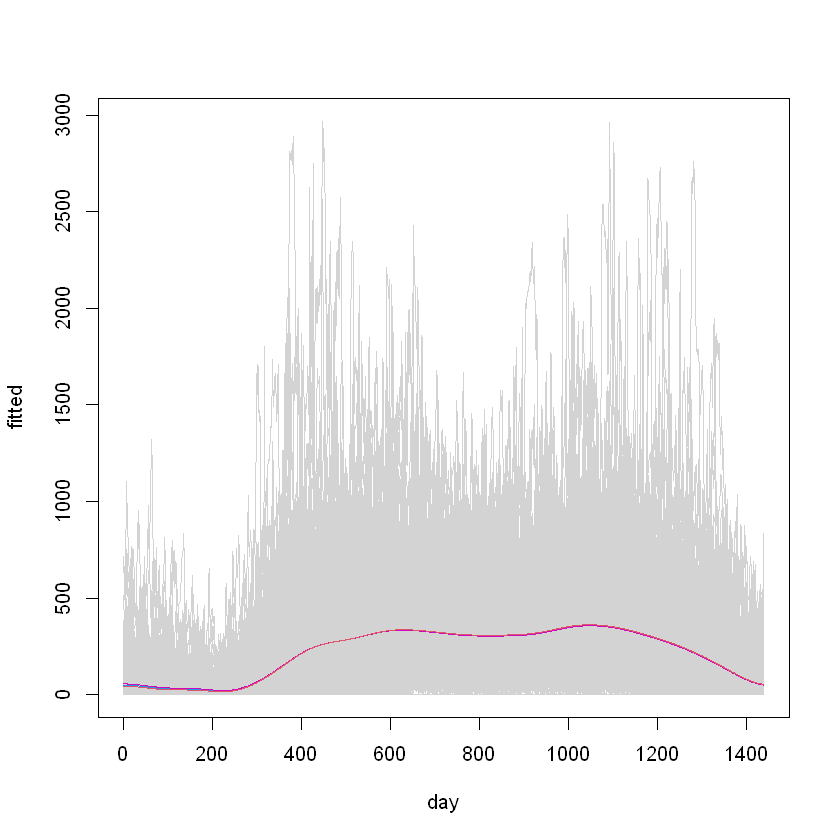

In [9]:
matplot(time, t(Y), type='l', lty = 1, 
        col='light grey', ylab="fitted", xlab="day")
matlines(time, t(yhat), type='l', lty = 1)

In [10]:
 rownames(Y) <- df$id

In [11]:
accel_df = as_refundObj(Y)
# value is the value of the activity count
# index is the percentage period over 24 hours

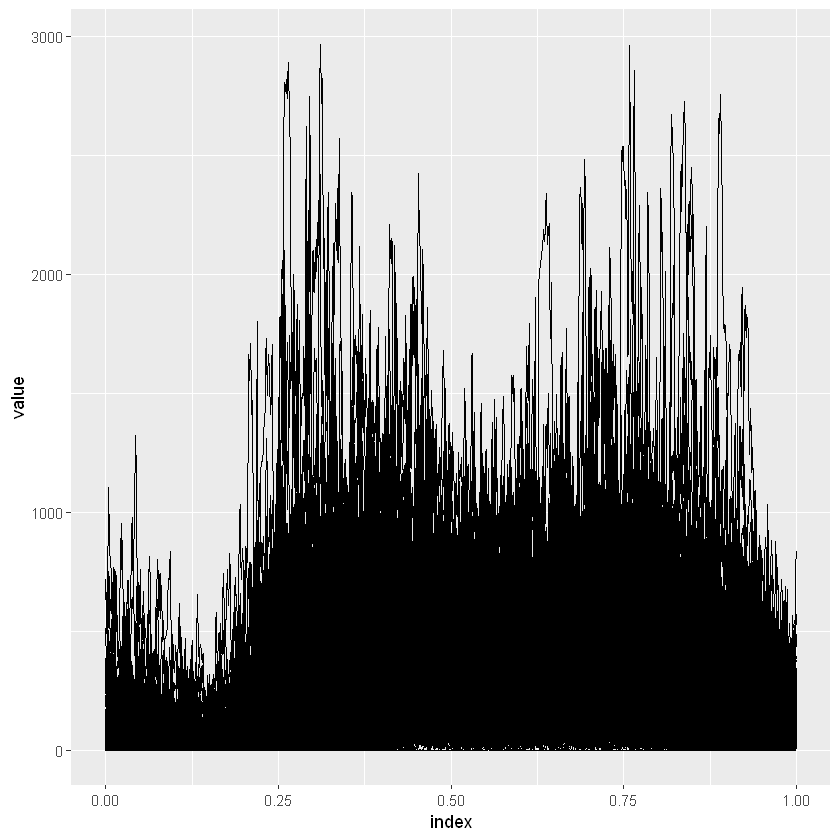

In [12]:
ggplot(accel_df, aes(x = index, y = value, group = id)) + geom_line()

In [13]:
# set plot size
options(repr.plot.width=15, repr.plot.height=10)

Joining, by = "id"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



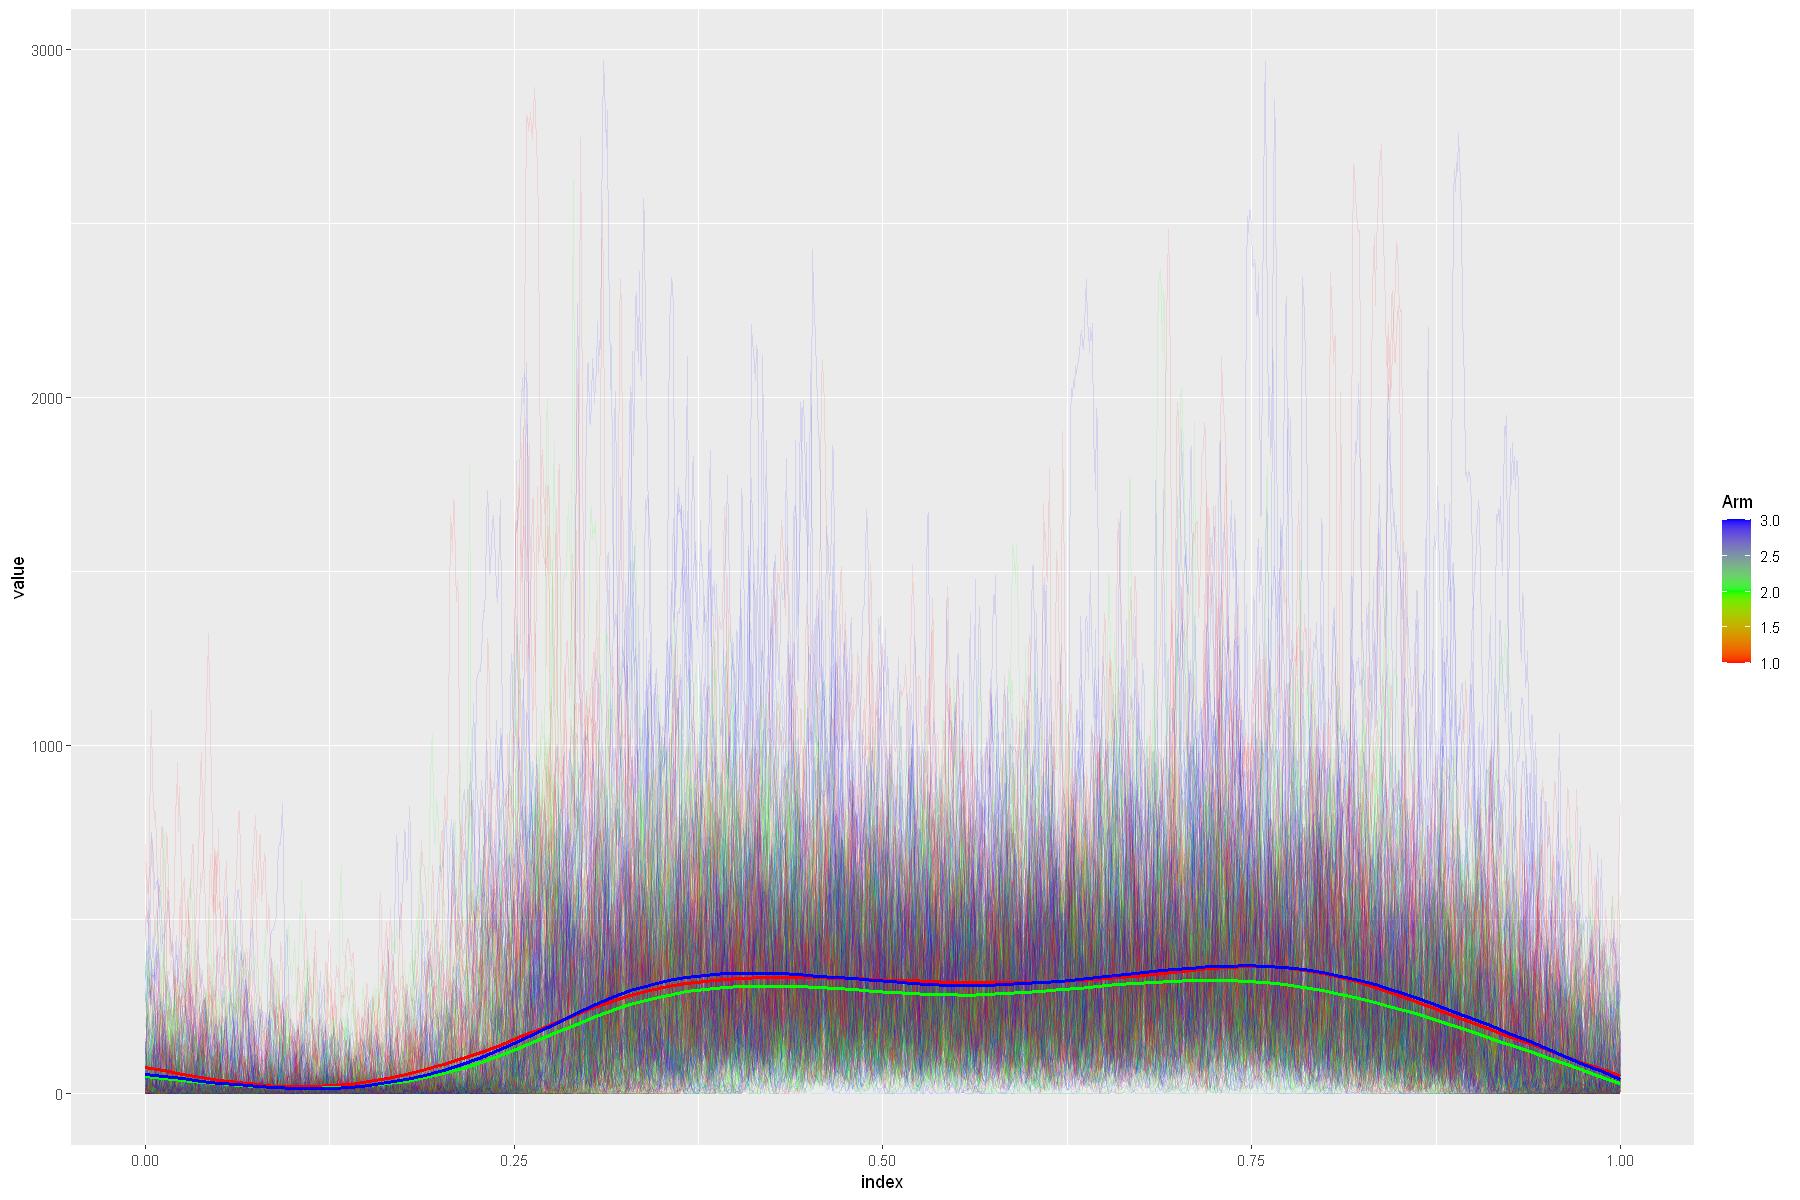

In [14]:
as_refundObj(Y) %>% 
    left_join(dplyr::select(df, id, Arm)) %>%
    ggplot(aes(x = index, y = value, group = id, color = Arm)) + geom_path(alpha = .1) +
    geom_smooth(aes(group = Arm), se = FALSE)+
scale_color_gradientn(colours = rainbow(3))

,T00h00,T00h01,T00h02,T00h03,T00h04,T00h05,T00h06,T00h07,T00h08,T00h09,...,T23h50,T23h51,T23h52,T23h53,T23h54,T23h55,T23h56,T23h57,T23h58,T23h59
T00h00,1.0000000,0.9431433,0.8534668,0.7951980,0.7603698,0.7297235,0.7147510,0.7293237,0.7070975,0.6610266,...,0.6182612,0.6328639,0.6770773,0.6573882,0.6226989,0.6157591,0.6566046,0.7353239,0.8651108,0.9541838
T00h01,0.9431433,1.0000000,0.9493977,0.8922330,0.8267709,0.7884523,0.7558174,0.7508958,0.7290096,0.6871143,...,0.6383470,0.6621432,0.6895553,0.6529493,0.6112091,0.6012284,0.6382107,0.6836115,0.7611565,0.8561660
T00h02,0.8534668,0.9493977,1.0000000,0.9655169,0.8945572,0.8214286,0.7724163,0.7605284,0.7422101,0.6979795,...,0.6235197,0.6522593,0.6716522,0.6286678,0.5870866,0.5829293,0.6202382,0.6529453,0.7113382,0.7601032
T00h03,0.7951980,0.8922330,0.9655169,1.0000000,0.9470398,0.8719157,0.7925184,0.7674631,0.7455373,0.7001673,...,0.6388128,0.6716850,0.6838667,0.6482115,0.6126177,0.6129078,0.6405744,0.6610969,0.6995451,0.7352132
T00h04,0.7603698,0.8267709,0.8945572,0.9470398,1.0000000,0.9678285,0.9104429,0.8625159,0.8342367,0.7903137,...,0.6604801,0.6808529,0.6658366,0.6095302,0.5687179,0.5724427,0.5947770,0.6085676,0.6526484,0.6951944
T00h05,0.7297235,0.7884523,0.8214286,0.8719157,0.9678285,1.0000000,0.9697327,0.9203128,0.8783864,0.8309026,...,0.6766220,0.6936350,0.6562922,0.5871452,0.5402434,0.5454675,0.5616866,0.5715983,0.6157190,0.6651694
T00h06,0.7147510,0.7558174,0.7724163,0.7925184,0.9104429,0.9697327,1.0000000,0.9729630,0.9341955,0.8644252,...,0.6593394,0.6669521,0.6252211,0.5419819,0.4888546,0.4895045,0.5070399,0.5229147,0.5854188,0.6428346
T00h07,0.7293237,0.7508958,0.7605284,0.7674631,0.8625159,0.9203128,0.9729630,1.0000000,0.9760497,0.8996452,...,0.6488064,0.6516160,0.6193792,0.5474995,0.5019127,0.5101809,0.5250943,0.5476103,0.6120309,0.6650042
T00h08,0.7070975,0.7290096,0.7422101,0.7455373,0.8342367,0.8783864,0.9341955,0.9760497,1.0000000,0.9482877,...,0.6202476,0.6237655,0.5960006,0.5350950,0.4873066,0.5067938,0.5165921,0.5356570,0.5892908,0.6370322
T00h09,0.6610266,0.6871143,0.6979795,0.7001673,0.7903137,0.8309026,0.8644252,0.8996452,0.9482877,1.0000000,...,0.6084472,0.6070501,0.5750167,0.5187723,0.4749462,0.5047630,0.5102217,0.5166534,0.5490483,0.5939641


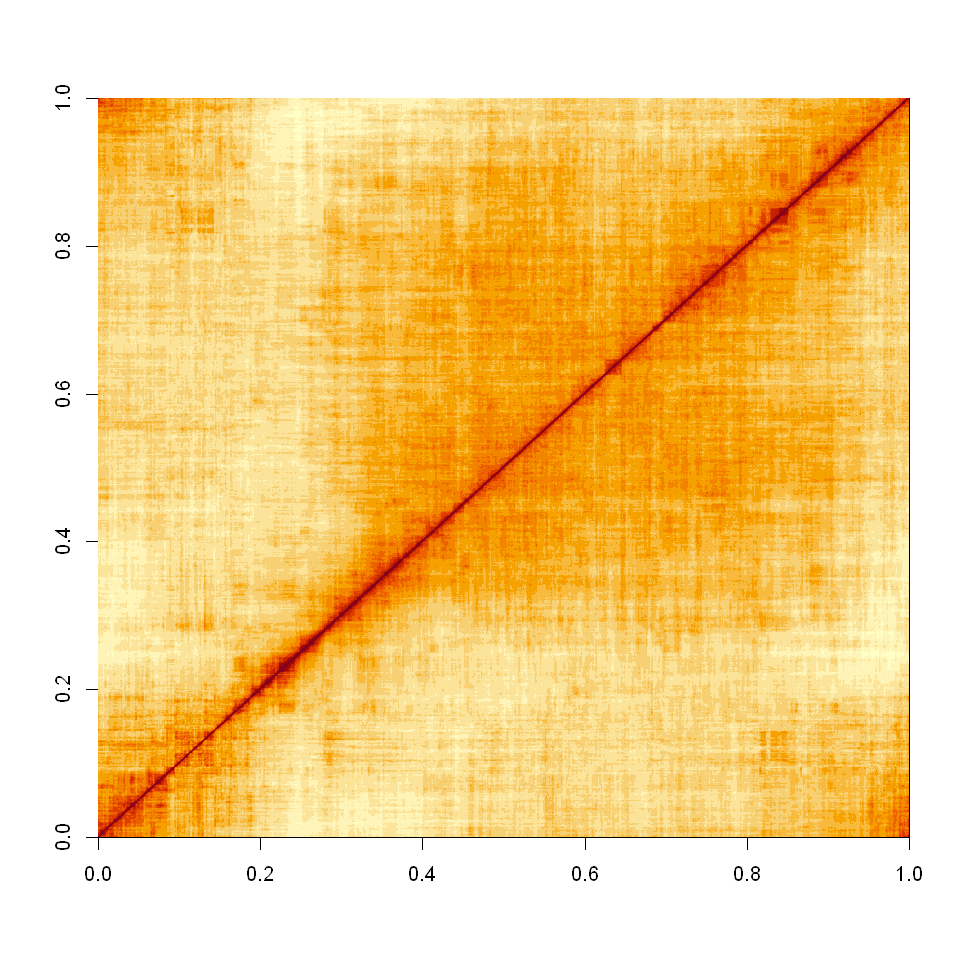

In [15]:
# set plot size
options(repr.plot.width=8, repr.plot.height=8)
cor(Y)
image(cor(Y))

## FANOVA

In [16]:
library(fdANOVA)

In [17]:
# Order data frame with respect to the group label
df <- df[order(df$Arm),]
head(df, 3)

id,Arm,T00h00,T00h01,T00h02,T00h03,T00h04,T00h05,T00h06,T00h07,...,T23h50,T23h51,T23h52,T23h53,T23h54,T23h55,T23h56,T23h57,T23h58,T23h59
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4.833333,0.00000,1.833333,3.500000,3.500000,4.666667,3.000000,27.83333,...,2.333333,2.333333,0.00000,0.00000,3.00000,9.50000,10.166667,7.166667,5.50000,4.833333
48,1,33.428571,11.28571,12.285714,15.000000,15.571429,11.285714,8.571429,13.42857,...,33.428571,10.142857,18.42857,21.00000,22.14286,12.28571,6.285714,9.571429,34.42857,37.714286
54,1,7.714286,0.00000,1.142857,1.142857,1.142857,0.000000,0.000000,0.00000,...,61.000000,59.428571,115.00000,70.14286,67.85714,22.00000,27.428571,41.142857,26.85714,21.285714


In [18]:
mat <- (as.matrix(df[,c(3:dim(df)[2])]))
rownames(mat) <- df$id
mat <- t(mat)

In [19]:
plotFANOVA(x = mat, int = intrng)

ERROR: Error in plotFANOVA(x = mat, int = intrng): object 'intrng' not found


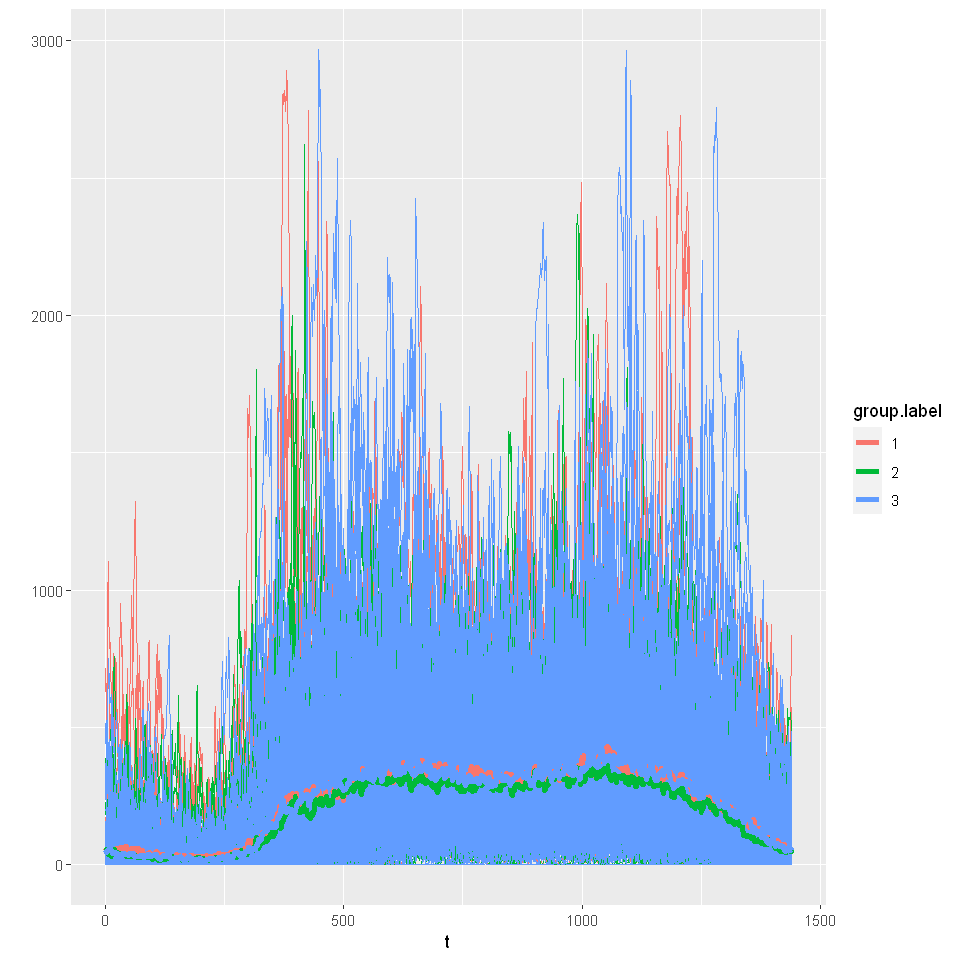

In [89]:
plotFANOVA(x = mat, group.label = as.character(df$Arm), int= intrng)

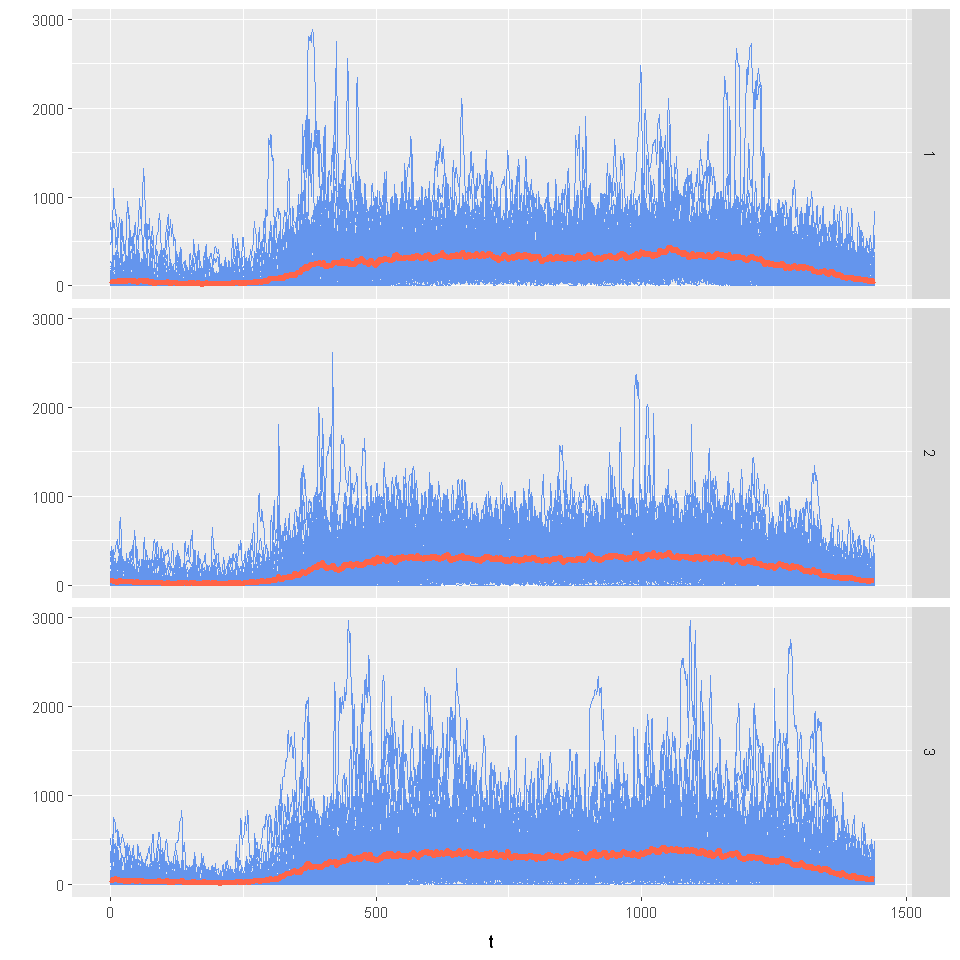

In [90]:
plotFANOVA(x = mat, group.label = as.character(df$Arm), int= intrng, separately = TRUE)

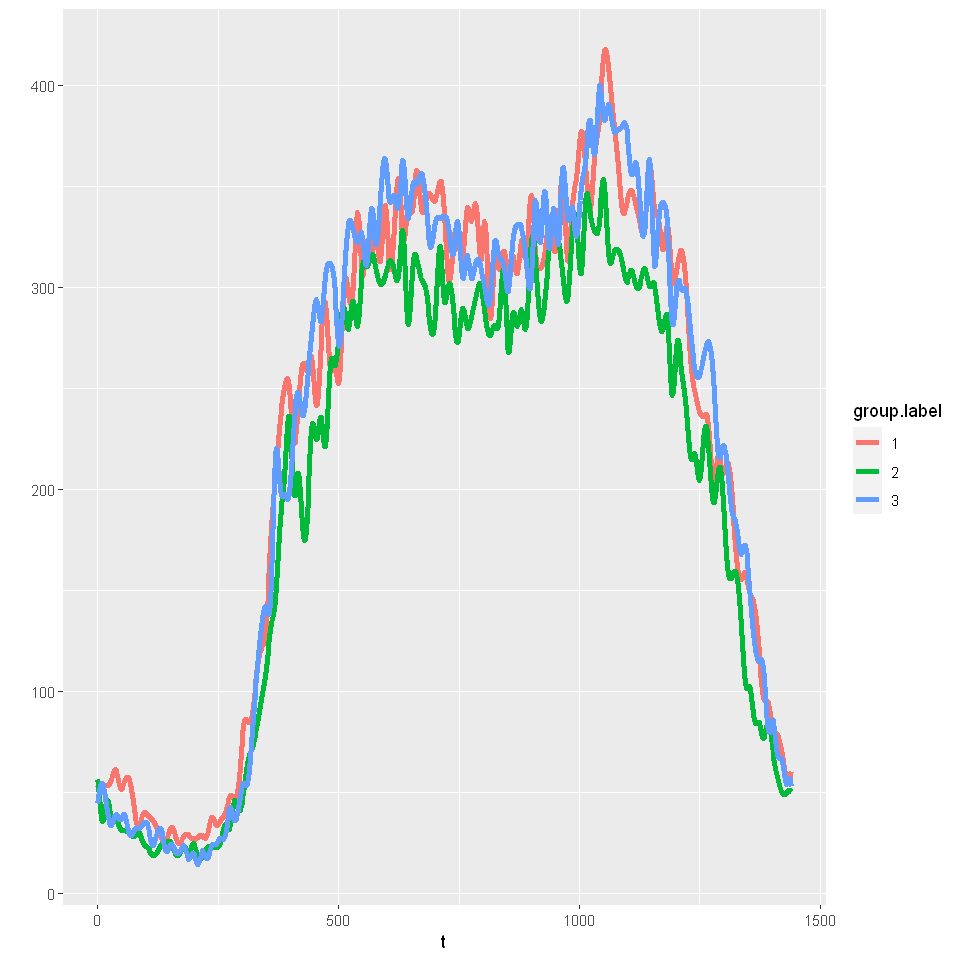

In [91]:
plotFANOVA(x = mat, group.label = as.character(df$Arm), int= intrng, means = TRUE, smooth = T)

In [92]:
set.seed(123)

In [93]:
fanova <- fanova.tests(x = mat, group.label = df$Arm)

In [94]:
fanova

     Analysis of Variance for Functional Data 
 
FP test - permutation test based on a basis function representation 
Test statistic = 1.163099  p-value = 0.213 
 
CH test - L2-norm-based parametric bootstrap test for homoscedastic samples 
Test statistic = 401027286  p-value = 0.2339 
 
CS test - L2-norm-based parametric bootstrap test for heteroscedastic samples 
Test statistic = 401027286  p-value = 0.2039 
 
L2N test - L2-norm-based test with naive method of estimation 
Test statistic = 134688005  p-value = 0.2611505 
 
L2B test - L2-norm-based test with bias-reduced method of estimation 
Test statistic = 134688005  p-value = 0.2566972 
 
L2b test - L2-norm-based bootstrap test 
Test statistic = 134688005  p-value = 0.2206 
 
FN test - F-type test with naive method of estimation 
Test statistic = 1.16312  p-value = 0.262235 
 
FB test - F-type test with bias-reduced method of estimation 
Test statistic = 1.16312  p-value = 0.2584798 
 
Fb test - F-type bootstrap test 
Test statisti

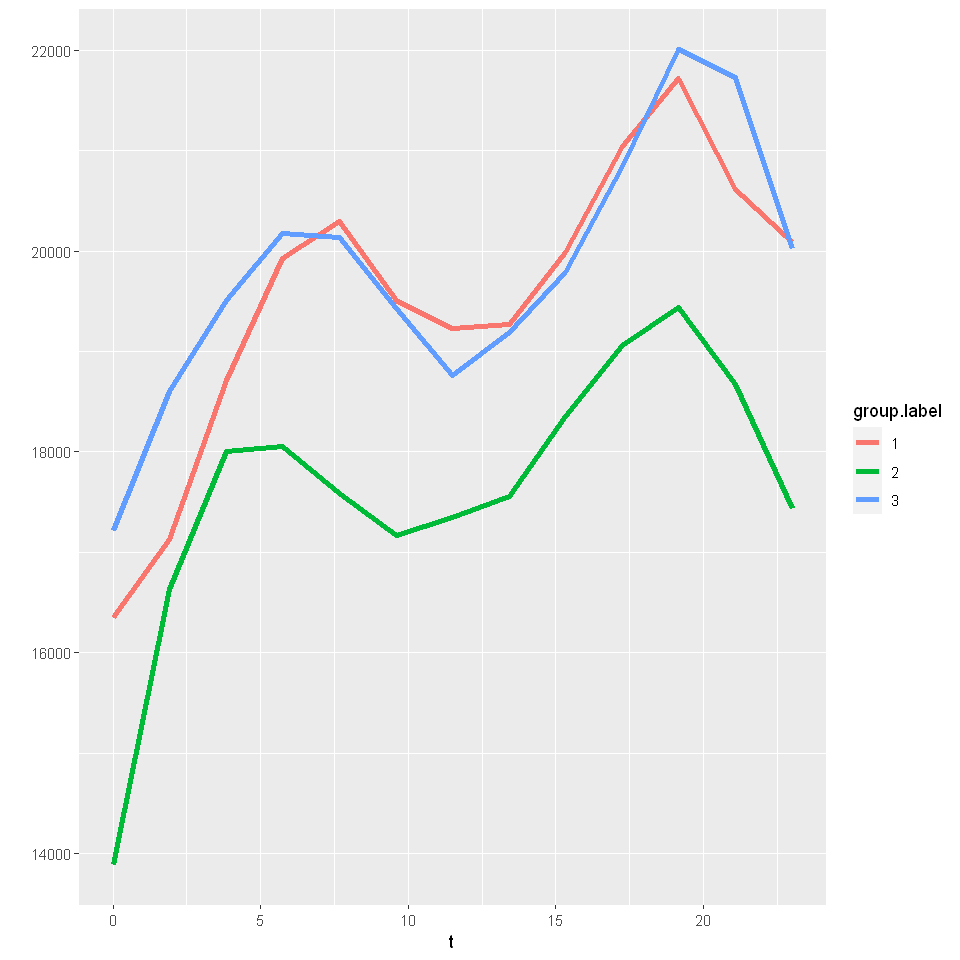

In [81]:
plotFANOVA(x = mat[c(8:20),], group.label = as.character(df$Arm), int= c(0, 23), means = TRUE, smooth = T)

In [75]:
fanovares <- fanova.tests(x = mat[c(8:20),], group.label = df$Arm)

In [ ]:
# Create temporal axis depending on the resolution of the data
time <- 1:(dim(df)[2]-2)

Y <- as.matrix(df[,c(3:dim(df)[2])]) # response: physical activity
X <- as.vector(df$Arm) # predictor: treatment assignment

myDat <- data.frame(X = X)
myDat$Y <- Y

dim(Y);length(X)

In [38]:
head(df)

id,Arm,T00h00,T01h00,T02h00,T03h00,T04h00,T05h00,T06h00,T07h00,...,T14h00,T15h00,T16h00,T17h00,T18h00,T19h00,T20h00,T21h00,T22h00,T23h00
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1847.3333,2348.8333,2302.6667,640.5000,8954.8333,36296.5000,21698.833,28110.500,...,29036.17,29858.000,26841.83,17509.17,11138.333,10732.167,10467.333,5652.667,1951.833,636.8333
4,3,810.8571,640.8571,861.4286,1477.4286,18658.1429,41676.2857,24472.000,21237.714,...,22506.86,22191.143,24635.14,16470.14,8380.429,6096.143,5007.286,5426.571,1947.143,2065.4286
40,2,161.1429,129.0000,684.0000,1248.0000,819.0000,7589.2857,12125.714,19641.000,...,11722.00,6680.714,12538.43,11551.14,9384.286,6575.571,7073.571,4720.571,3781.286,221.1429
43,2,1525.4286,1008.4286,1497.7143,596.1429,2173.8571,1759.2857,3420.571,12241.286,...,19199.00,20707.429,10264.57,21916.29,12331.286,23899.714,13073.286,17738.714,18024.714,9056.7143
44,3,2230.7143,1398.2857,2921.8571,874.1429,532.4286,654.1429,391.000,6029.571,...,15835.71,19799.429,13415.29,13196.29,14432.714,16892.000,10119.857,15920.429,14465.571,8347.1429
48,1,3508.7143,5055.1429,1282.7143,6525.2857,8762.5714,12534.0000,22095.000,21324.714,...,15861.29,24522.000,26086.86,26633.86,35679.429,26734.429,7106.714,7710.429,9381.429,1412.8571


In [35]:
gait.data.frame <- as.data.frame(gait)

In [37]:
head(gait.data.frame)

,boy1.Hip Angle,boy2.Hip Angle,boy3.Hip Angle,boy4.Hip Angle,boy5.Hip Angle,boy6.Hip Angle,boy7.Hip Angle,boy8.Hip Angle,boy9.Hip Angle,boy10.Hip Angle,...,boy30.Knee Angle,boy31.Knee Angle,boy32.Knee Angle,boy33.Knee Angle,boy34.Knee Angle,boy35.Knee Angle,boy36.Knee Angle,boy37.Knee Angle,boy38.Knee Angle,boy39.Knee Angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.025,37,47,46,37,20,57,46,46,46,35,...,17,20,18,9,8,9,13,19,16,14
0.075,36,46,44,36,18,48,38,46,42,34,...,25,20,18,12,10,18,18,23,23,25
0.125,33,42,39,27,11,44,33,43,37,29,...,30,22,25,16,17,19,27,26,28,32
0.175,29,34,34,20,8,35,25,40,34,28,...,30,16,23,15,16,19,26,25,28,34
0.225,23,27,33,15,7,31,18,36,31,19,...,27,10,18,14,12,19,25,21,25,30
0.275,18,21,27,15,5,27,15,30,25,15,...,22,10,19,11,10,15,18,18,21,20


In [39]:
x.gait <- vector("list", 2)

In [40]:
x.gait

[[1]]
NULL

[[2]]
NULL

In [41]:
x.gait[[1]] <- as.matrix(gait.data.frame[, 1:39])
x.gait

,boy1.Hip Angle,boy2.Hip Angle,boy3.Hip Angle,boy4.Hip Angle,boy5.Hip Angle,boy6.Hip Angle,boy7.Hip Angle,boy8.Hip Angle,boy9.Hip Angle,boy10.Hip Angle,...,boy30.Hip Angle,boy31.Hip Angle,boy32.Hip Angle,boy33.Hip Angle,boy34.Hip Angle,boy35.Hip Angle,boy36.Hip Angle,boy37.Hip Angle,boy38.Hip Angle,boy39.Hip Angle
0.025,37,47,46,37,20,57,46,46,46,35,...,46,54,52,32,46,46,48,44,55,48
0.075,36,46,44,36,18,48,38,46,42,34,...,47,48,44,28,41,44,42,41,56,50
0.125,33,42,39,27,11,44,33,43,37,29,...,44,44,44,26,38,40,42,38,51,47
0.175,29,34,34,20,8,35,25,40,34,28,...,37,37,33,22,31,35,35,32,46,42
0.225,23,27,33,15,7,31,18,36,31,19,...,29,30,28,19,25,31,30,24,41,37
0.275,18,21,27,15,5,27,15,30,25,15,...,23,27,27,13,20,25,23,18,36,29
0.325,15,16,21,10,1,21,14,24,19,13,...,19,21,23,8,13,19,19,10,30,22
0.375,12,12,15,6,0,18,10,17,17,6,...,14,18,24,5,7,15,14,6,25,14
0.425,9,4,7,3,-2,14,8,12,13,0,...,8,15,19,-1,1,10,9,3,21,8
0.475,6,-1,1,0,-4,10,4,7,10,-1,...,3,11,15,-6,-4,5,4,0,15,5


In [42]:
group.label.gait <- rep(1:3, each = 13)

In [43]:
group.label.gait

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3

In [19]:
temp_df = df
temp_df$Arm = as.factor(temp_df$Arm)

In [20]:
temp_df$accel = Y

In [21]:
temp_df$mean_accel = apply(Y, 1, mean)

In [22]:
mod1 = lm(mean_accel~Arm, data = temp_df)
summary(mod1)


Call:
lm(formula = mean_accel ~ Arm, data = temp_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13620.2  -3788.9   -746.9   2856.8  16920.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13707.23     543.51  25.220   <2e-16 ***
Arm2        -1609.04     779.73  -2.064    0.040 *  
Arm3           13.87     760.50   0.018    0.985    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5185 on 269 degrees of freedom
Multiple R-squared:  0.0208,	Adjusted R-squared:  0.01352 
F-statistic: 2.857 on 2 and 269 DF,  p-value: 0.05918


Warning message in model.matrix.default(mt_fixed, mf_fixed, contrasts):
"non-list contrasts argument ignored"


Using OLS to estimate residual covariance 
GLS 


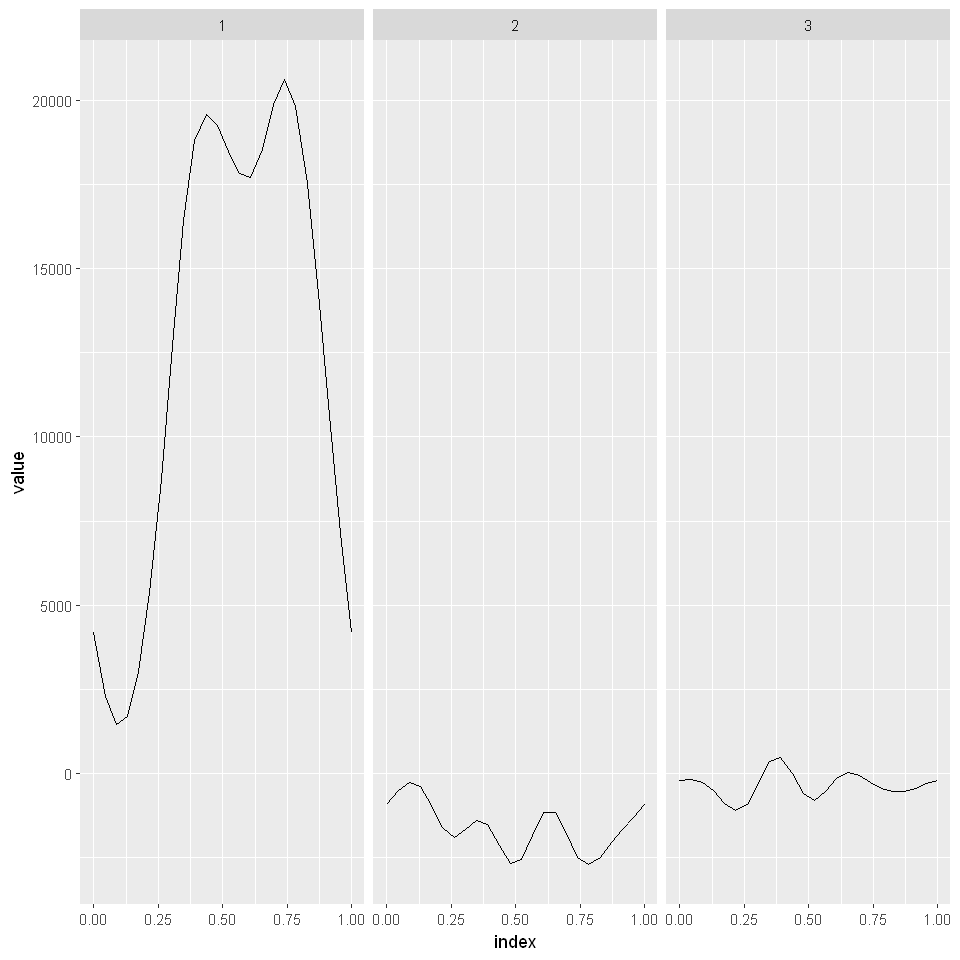

In [23]:
# kt number of basis functions
fosr_slr = bayes_fosr(accel ~ Arm, data = temp_df, 
                                            est.method = "GLS", Kt = 8, basis = "pbs")


## Warning in model.matrix.default(mt_fixed, mf_fixed, contrasts): non-list
## contrasts argument ignored
## Using OLS to estimate residual covariance 
## GLS

as_refundObj(fosr_slr$beta.hat) %>% 
    ggplot(aes(x = index, y = value)) + facet_grid(~id) + geom_path()

In [24]:
tt = tibble(
    A = c(1,1,1,2,2,2,3,3,3)
    )

In [25]:
dd <- tibble(
    A = c(1,2,3),
    B = c("a","b","c")
    )

In [64]:
dd

A,B
<dbl>,<chr>
1,a
2,b
3,c


In [65]:
left_join(tt,dd)

Joining, by = "A"



A,B
<dbl>,<chr>
1,a
1,a
1,a
2,b
2,b
2,b
3,c
3,c
3,c


In [ ]:
> wheat = read.table('http://www.stat.berkeley.edu/classes/s133/data/wheat.txt',header=TRUE)
> plot(wheat$year,wheat$production)
> lines(smooth.spline(wheat$year,wheat$production))